<a href="https://colab.research.google.com/github/sheikh495/database/blob/main/M10_9_Coding_Assignment_PythonandSQLiteIntegration_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Set Up the Database

In [35]:
from google.colab import files
uploaded = files.upload()  # Upload the chinook.db file


Saving chinook.db to chinook.db


# Step 2: Connecting to the Database

In [36]:
import sqlite3

def connect_to_db(db_path):
    try:
        # Establish a connection to the SQLite database
        conn = sqlite3.connect(db_path)
        print("Connection successful!")
        return conn
    except sqlite3.Error as e:
        print(f"Error connecting to database: {e}")
        return None

# Path to the uploaded chinook.db file in Google Colab
db_path = "/content/chinook.db"

# Connect to the database
conn = connect_to_db(db_path)


Connection successful!


# Step 3: Read Records

**View all employees in the employees table:**

In [37]:
#import sqlite3
import pandas as pd
from IPython.display import HTML, display

# Connect to the SQLite database (make sure the file path is correct)
#conn = sqlite3.connect('/content/chinook.db')

# Function to view all employees
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Display centered text with font size 20, bold, and green color
display(HTML('<p style="font-size:20px; font-weight:bold; text-align:center; color:green;">View all employees in the employees table:</p>'))

# Test: View all employees and display the table
if conn:
    employees_df = view_all_employees(conn)

    if not employees_df.empty:
        display(employees_df)  # Displays as a table in Colab
    else:
        display(HTML('<p style="font-size:16px; color:red; text-align:center;">No employees found.</p>'))


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


                 Title  Count
0      General Manager      1
1           IT Manager      1
2             IT Staff      2
3        Sales Manager      1
4  Sales Support Agent      3


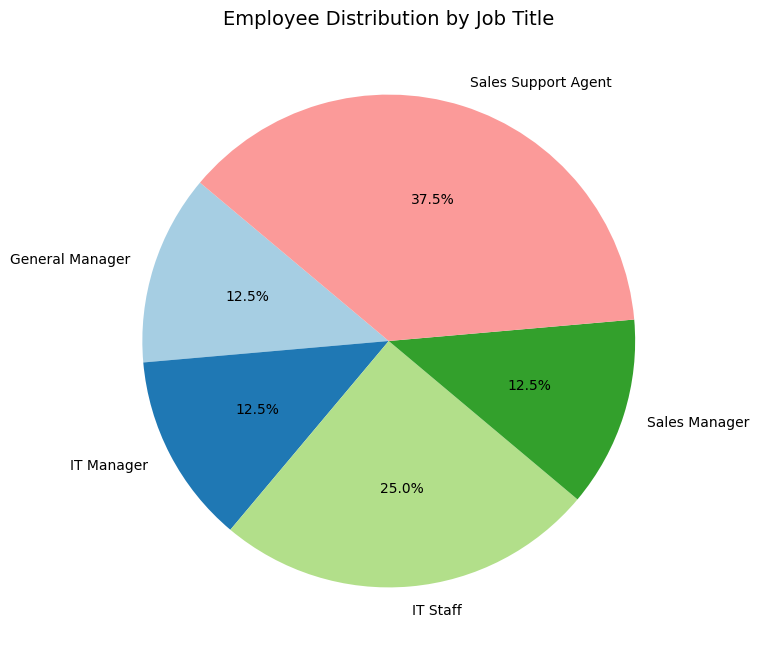

In [38]:
import matplotlib.pyplot as plt

# Function to retrieve employee data grouped by title
def get_employee_count_by_title(conn):
    query = """
    SELECT Title, COUNT(*) as Count
    FROM employees
    GROUP BY Title
    """
    try:
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error fetching data: {e}")
        return None


# Fetch data
if conn:
    employee_counts = get_employee_count_by_title(conn)

    if employee_counts is not None:
       # Display the data as a DataFrame
        print(employee_counts)
        # Pie chart visualization
        plt.figure(figsize=(8, 8))
        plt.pie(
            employee_counts['Count'],
            labels=employee_counts['Title'],
            autopct='%1.1f%%',
            startangle=140,
            colors=plt.cm.Paired.colors
        )
        plt.title('Employee Distribution by Job Title', fontsize=14)
        plt.show()


**View employees by job title:**

In [39]:
#from IPython.display import HTML, display

# Function to view employees by job title
def view_employee_by_title(conn, title):
    try:
        query = "SELECT * FROM employees WHERE Title = ?"
        df = pd.read_sql_query(query, conn, params=(title,))
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees by title: {e}")

# Test: View all employees
if conn:
    # Display all employees
    display(HTML('<p style="font-size:20px; font-weight:bold; text-align:center; color:green;">All Employees:</p>'))
    employees_df = view_all_employees(conn)
    if not employees_df.empty:
        display(employees_df)
    else:
        display(HTML('<p style="font-size:16px; color:red; text-align:center;">No employees found.</p>'))

    # Example: View employees by title "Sales Support Agent"
    title = "Sales Support Agent"  # Modify this as needed
    display(HTML('<p style="font-size:25px; font-weight:bold; text-align:center; color:blue;">Employees with \'Sales Support Agent\' title:</p>'))
    employees_by_title_df = view_employee_by_title(conn, title)
    if not employees_by_title_df.empty:
        display(employees_by_title_df)
    else:
        display(HTML('<p style="font-size:16px; color:red; text-align:center;">No employees found with the specified title.</p>'))


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
1,4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
2,5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


# Step 4: Create Records

In [40]:
#import sqlite3
#import pandas as pd
#from IPython.display import HTML, display

# Connect to the SQLite database
#conn = sqlite3.connect('/content/chinook.db')

# Function to add a new employee
def add_employee(conn, employee_data):
    try:
        query = """
        INSERT INTO employees (FirstName, LastName, Title, ReportsTo, BirthDate, HireDate, Address, City, State, Country, PostalCode, Phone, Fax, Email)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """
        conn.execute(query, employee_data)
        conn.commit()
        display(HTML("<p style='color: blue; font-size: 25px; text-align: center;'>Employee added successfully!</p>"))
    except sqlite3.Error as e:
        print(f"Error adding employee: {e}")

# Function to view all employees
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Sample data to add a new employee
new_employee = ('Sheikh', 'Uddin', 'Sales Manager', 2, '1985-07-15', '2024-11-01', '1234 Elm St', 'Fairfax', 'VA', 'USA', '22030', '555-1234', '555-5678', 'suddin@example.com')

# Test: Add a new employee
if conn:

   # Display all employees before adding the new employee
    display(HTML("<p style='color: green; font-size: 25px; text-align: center;'>Employees before adding new employee:</p>"))




   # print("Employees before adding new employee:")
    employees_before = view_all_employees(conn)
    display(employees_before)


    add_employee(conn, new_employee)

    # Display all employees after adding the new one
    employees_df = view_all_employees(conn)
    # Highlight newly added employee
    highlight = employees_df['FirstName'] == 'Sheikh'  # Customize the highlight condition
    styled_table = employees_df.style.apply(lambda x: ['background-color: yellow' if v else '' for v in highlight], axis=0)
    display(styled_table)


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,nan,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.000000,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.000000,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.000000,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.000000,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.000000,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.000000,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.000000,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com
8,9,Uddin,Sheikh,Sales Manager,2.000000,1985-07-15,2024-11-01,1234 Elm St,Fairfax,VA,USA,22030,555-1234,555-5678,suddin@example.com


# Step 5: Update Records

In [41]:
import sqlite3
import pandas as pd
from IPython.display import HTML, display

# Function to update employee title
def update_employee_title(conn, employee_id, new_title):
    try:
        query = "UPDATE employees SET Title = ? WHERE EmployeeID = ?"
        conn.execute(query, (new_title, employee_id))
        conn.commit()
        # Display success message
        display(HTML(f"<p style='color: blue; font-size: 25px; text-align: center;'>Employee ID {employee_id} title updated to {new_title}</p>"))
    except sqlite3.Error as e:
        print(f"Error updating employee title: {e}")

# Function to view all employees
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Test: Update the title of an existing employee (Employee ID 9)
if conn:
    update_employee_title(conn, 9, 'Sales Agent')

    # Display all employees after the update
    employees_df = view_all_employees(conn)

    # Display the table of employees without highlighting
    display(employees_df)


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com
8,9,Uddin,Sheikh,Sales Agent,2.0,1985-07-15,2024-11-01,1234 Elm St,Fairfax,VA,USA,22030,555-1234,555-5678,suddin@example.com


# Step 6: Delete Records

In [42]:
def delete_employee(conn, employee_id):
    try:
        query = "DELETE FROM employees WHERE EmployeeID = ?"
        conn.execute(query, (employee_id,))
        conn.commit()
        print(f"Employee ID {employee_id} deleted successfully!")
    except sqlite3.Error as e:
        print(f"Error deleting employee: {e}")

# Test: Delete the employee with ID 10
if conn:
    delete_employee(conn, 10)


Employee ID 10 deleted successfully!


In [43]:
#import sqlite3
import pandas as pd
from IPython.display import display, HTML

# Function to view all employees
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# View employees after deletion
if conn:
    # Display the styled message
    display(HTML("<p style='color: blue; font-size: 25px; text-align: center;'>View employees after deletion</p>"))

    # Retrieve all employees after deletion
    employees_after_deletion = view_all_employees(conn)

    # Check if there are any employees after deletion
    if not employees_after_deletion.empty:
        display(employees_after_deletion)  # Display the employees table
    else:
        print("No employees found.")


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com
8,9,Uddin,Sheikh,Sales Agent,2.0,1985-07-15,2024-11-01,1234 Elm St,Fairfax,VA,USA,22030,555-1234,555-5678,suddin@example.com


# Step 7: Close the Connection

In [44]:
# Close the database connection
if conn:
    conn.close()
    display(HTML("<p style='color: blue; font-size: 25px; text-align: center;'>Database connection closed.</p>"))
   # print("Database connection closed.")
